In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Load ETa data

In [2]:
US_myb = pd.read_excel('/home/jovyan/Team4/Data/AmeriFlux_ETa/All_Tower_Clean_data.xlsx', sheet_name = 'US-Myb', parse_dates = ['Date'])
US_Sne = pd.read_excel('/home/jovyan/Team4/Data/AmeriFlux_ETa/All_Tower_Clean_data.xlsx', sheet_name = 'US-Sne', parse_dates = ['Date'])
US_Snf = pd.read_excel('/home/jovyan/Team4/Data/AmeriFlux_ETa/All_Tower_Clean_data.xlsx', sheet_name = 'US-Snf', parse_dates = ['Date'])
US_Tw1 = pd.read_excel('/home/jovyan/Team4/Data/AmeriFlux_ETa/All_Tower_Clean_data.xlsx', sheet_name = 'US-Tw1', parse_dates = ['Date'])
US_Tw2 = pd.read_excel('/home/jovyan/Team4/Data/AmeriFlux_ETa/All_Tower_Clean_data.xlsx', sheet_name = 'US-Tw2', parse_dates = ['Date'])
US_Tw3 = pd.read_excel('/home/jovyan/Team4/Data/AmeriFlux_ETa/All_Tower_Clean_data.xlsx', sheet_name = 'US-Tw3', parse_dates = ['Date'])
US_Tw4 = pd.read_excel('/home/jovyan/Team4/Data/AmeriFlux_ETa/All_Tower_Clean_data.xlsx', sheet_name = 'US-Tw4', parse_dates = ['Date'])
US_Tw5 = pd.read_excel('/home/jovyan/Team4/Data/AmeriFlux_ETa/All_Tower_Clean_data.xlsx', sheet_name = 'US-Tw5', parse_dates = ['Date'])

# Load Vegetation Indices and Thermal Indices

In [3]:
NDVI_EVI = pd.read_csv('/home/jovyan/Team4/Data/MODIS_Indices/MODIS_NDVI_EVI_Extraction.csv', parse_dates = ['Date'])
FPAR_LAI = pd.read_csv('/home/jovyan/Team4/Data/MODIS_Indices/MODIS_FPAR_LAI_Extraction.csv', parse_dates = ['Date'])
LST_DLST = pd.read_csv('/home/jovyan/Team4/Data/MODIS_Indices/MODIS_LST_DLST_Extraction.csv', parse_dates = ['Date'])

# Merge and Interpolate all variables

# (a) Station US-myb

In [4]:
US_myb

,Date,Site_Name,TA,SW_IN,LW_IN,VPD,PA,P,WS,LE,H,ETa
0,2010-01-01,Mayberry Wetland,10.767,64.252,345.117,2.622,102.445,0.001,1.328,57.7050,23.932700,2.013958
1,2010-01-02,Mayberry Wetland,11.230,86.497,332.308,2.044,102.244,0.219,1.208,38.9442,1.402940,1.359789
2,2010-01-03,Mayberry Wetland,7.749,96.941,290.054,1.599,101.939,0.005,1.889,54.8205,10.706200,1.907795
3,2010-01-04,Mayberry Wetland,8.396,132.200,274.652,2.136,101.889,0.000,1.482,57.7050,23.932700,2.009414
4,2010-01-05,Mayberry Wetland,7.649,88.983,295.321,2.222,101.942,0.003,0.958,38.9442,1.402940,1.355159
...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,Mayberry Wetland,7.718,111.213,296.163,2.399,100.901,4.919,4.279,48.6873,10.726900,1.694305
4379,2021-12-28,Mayberry Wetland,5.996,91.804,302.650,2.463,100.750,0.000,2.299,35.7856,7.910330,1.243293
4380,2021-12-29,Mayberry Wetland,6.157,38.341,326.851,0.883,100.451,6.607,3.564,20.9495,0.176889,0.727956
4381,2021-12-30,Mayberry Wetland,7.927,131.792,296.484,2.349,100.915,0.002,1.475,50.0932,8.005720,1.743576


In [5]:
NDVI_EVI

,Date,Site_Name,NDVI,EVI
0,2000-02-18,Twitchell Island,0.089751,0.140238
1,2000-02-26,Twitchell Island,0.382246,0.091054
2,2000-03-05,Twitchell Island,0.397163,0.138107
3,2000-03-13,Twitchell Island,0.413690,0.167054
4,2000-03-21,Twitchell Island,0.396433,0.170609
...,...,...,...,...
10965,2023-11-25,Mayberry Wetland,0.524978,0.230040
10966,2023-12-03,Mayberry Wetland,0.519279,0.198819
10967,2023-12-11,Mayberry Wetland,0.557664,0.217900
10968,2023-12-19,Mayberry Wetland,0.446847,0.192397


In [6]:
# merge weather variables with vegetation indices for US-myb staton
US_myb1 = US_myb.merge(NDVI_EVI, how = 'left', on = ['Date', 'Site_Name'])
US_myb2 = US_myb1.merge(FPAR_LAI, how = 'left', on = ['Date', 'Site_Name'])
US_myb_all_variables = US_myb2.merge(LST_DLST, how = 'left', on = ['Date', 'Site_Name'])

# Perform linear interpolation on NDVI, EVI, FPAR, LAI, LST, and DLST columns
US_myb_all_variables['NDVI'] = US_myb_all_variables['NDVI'].interpolate(method='linear')
US_myb_all_variables['EVI'] = US_myb_all_variables['EVI'].interpolate(method='linear')
US_myb_all_variables['FPAR'] = US_myb_all_variables['FPAR'].interpolate(method='linear')
US_myb_all_variables['LAI'] = US_myb_all_variables['LAI'].interpolate(method='linear')
US_myb_all_variables['LST'] = US_myb_all_variables['LST'].interpolate(method='linear')
US_myb_all_variables['DLST'] = US_myb_all_variables['DLST'].interpolate(method='linear')

In [7]:
US_myb_all_variables

,Date,Site_Name,TA,SW_IN,LW_IN,VPD,PA,P,WS,LE,H,ETa,NDVI,EVI,FPAR,LAI,LST,DLST
0,2010-01-01,Mayberry Wetland,10.767,64.252,345.117,2.622,102.445,0.001,1.328,57.7050,23.932700,2.013958,-0.005150,-0.025297,0.0800,0.100,NaN,276.8800
1,2010-01-02,Mayberry Wetland,11.230,86.497,332.308,2.044,102.244,0.219,1.208,38.9442,1.402940,1.359789,0.044595,-0.001610,0.0675,0.075,NaN,277.4775
2,2010-01-03,Mayberry Wetland,7.749,96.941,290.054,1.599,101.939,0.005,1.889,54.8205,10.706200,1.907795,0.094340,0.022077,0.0550,0.050,NaN,278.0750
3,2010-01-04,Mayberry Wetland,8.396,132.200,274.652,2.136,101.889,0.000,1.482,57.7050,23.932700,2.009414,0.144084,0.045764,0.0425,0.025,NaN,278.6725
4,2010-01-05,Mayberry Wetland,7.649,88.983,295.321,2.222,101.942,0.003,0.958,38.9442,1.402940,1.355159,0.193829,0.069451,0.0300,0.000,NaN,279.2700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,Mayberry Wetland,7.718,111.213,296.163,2.399,100.901,4.919,4.279,48.6873,10.726900,1.694305,0.526618,0.258294,0.3400,0.600,282.76,276.1600
4379,2021-12-28,Mayberry Wetland,5.996,91.804,302.650,2.463,100.750,0.000,2.299,35.7856,7.910330,1.243293,0.526618,0.258294,0.3325,0.575,282.76,276.1600
4380,2021-12-29,Mayberry Wetland,6.157,38.341,326.851,0.883,100.451,6.607,3.564,20.9495,0.176889,0.727956,0.526618,0.258294,0.3250,0.550,282.76,276.1600
4381,2021-12-30,Mayberry Wetland,7.927,131.792,296.484,2.349,100.915,0.002,1.475,50.0932,8.005720,1.743576,0.526618,0.258294,0.3175,0.525,282.76,276.1600


In [8]:
# drop rows if any Nan value contains
US_myb_all_variables.dropna()

,Date,Site_Name,TA,SW_IN,LW_IN,VPD,PA,P,WS,LE,H,ETa,NDVI,EVI,FPAR,LAI,LST,DLST
8,2010-01-09,Mayberry Wetland,7.164,55.548,324.628,1.218,102.047,0.012,1.135,54.8205,10.706200,1.906734,0.392808,0.164200,0.4100,0.700,286.560,281.6600
9,2010-01-10,Mayberry Wetland,7.238,90.177,312.783,1.253,102.001,0.042,1.152,57.7050,23.932700,2.007202,0.404308,0.174980,0.3625,0.600,286.235,281.1925
10,2010-01-11,Mayberry Wetland,8.645,114.430,314.842,1.970,101.687,0.003,1.407,38.9442,1.402940,1.356443,0.415807,0.185759,0.3150,0.500,285.910,280.7250
11,2010-01-12,Mayberry Wetland,13.259,70.536,345.593,3.234,101.395,6.481,2.986,54.8205,10.706200,1.917844,0.427307,0.196539,0.2675,0.400,285.585,280.2575
12,2010-01-13,Mayberry Wetland,13.055,110.283,309.813,3.241,101.848,2.554,3.701,57.7050,23.932700,2.018362,0.438807,0.207319,0.2200,0.300,285.260,279.7900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,Mayberry Wetland,7.718,111.213,296.163,2.399,100.901,4.919,4.279,48.6873,10.726900,1.694305,0.526618,0.258294,0.3400,0.600,282.760,276.1600
4379,2021-12-28,Mayberry Wetland,5.996,91.804,302.650,2.463,100.750,0.000,2.299,35.7856,7.910330,1.243293,0.526618,0.258294,0.3325,0.575,282.760,276.1600
4380,2021-12-29,Mayberry Wetland,6.157,38.341,326.851,0.883,100.451,6.607,3.564,20.9495,0.176889,0.727956,0.526618,0.258294,0.3250,0.550,282.760,276.1600
4381,2021-12-30,Mayberry Wetland,7.927,131.792,296.484,2.349,100.915,0.002,1.475,50.0932,8.005720,1.743576,0.526618,0.258294,0.3175,0.525,282.760,276.1600


# (b) Station US-Sne

In [9]:
# merge weather variables with vegetation indices for US-Sne staton
US_Sne1 = US_Sne.merge(NDVI_EVI, how = 'left', on = ['Date', 'Site_Name'])
US_Sne2 = US_Sne1.merge(FPAR_LAI, how = 'left', on = ['Date', 'Site_Name'])
US_Sne_all_variables = US_Sne2.merge(LST_DLST, how = 'left', on = ['Date', 'Site_Name'])

# Perform linear interpolation on NDVI, EVI, FPAR, LAI, LST, and DLST columns
US_Sne_all_variables['NDVI'] = US_Sne_all_variables['NDVI'].interpolate(method='linear')
US_Sne_all_variables['EVI'] = US_Sne_all_variables['EVI'].interpolate(method='linear')
US_Sne_all_variables['FPAR'] = US_Sne_all_variables['FPAR'].interpolate(method='linear')
US_Sne_all_variables['LAI'] = US_Sne_all_variables['LAI'].interpolate(method='linear')
US_Sne_all_variables['LST'] = US_Sne_all_variables['LST'].interpolate(method='linear')
US_Sne_all_variables['DLST'] = US_Sne_all_variables['DLST'].interpolate(method='linear')

In [10]:
US_Sne_all_variables

,Date,Site_Name,TA,SW_IN,LW_IN,VPD,PA,P,WS,LE,H,ETa,NDVI,EVI,FPAR,LAI,LST,DLST
0,2016-01-01,Sherman Island Restored Wetland,4.562,121.854,67592.543,4.105,102.031,0.000,2.307,100.67900,59.54540,3.493119,0.044001,0.044272,0.210,0.30,280.46,274.02
1,2016-01-02,Sherman Island Restored Wetland,5.591,108.846,41856.119,3.564,101.728,0.000,2.014,93.67310,64.76100,3.253218,0.094367,0.061113,0.180,0.25,280.92,274.73
2,2016-01-03,Sherman Island Restored Wetland,7.111,99.851,36097.240,3.415,101.097,0.242,2.331,104.59700,60.05590,3.637848,0.144733,0.077953,0.150,0.20,281.38,275.44
3,2016-01-04,Sherman Island Restored Wetland,9.261,50.295,9249.724,2.731,100.596,4.851,3.242,100.67900,59.54540,3.508751,0.195098,0.094794,0.120,0.15,281.84,276.15
4,2016-01-05,Sherman Island Restored Wetland,10.365,66.386,13488.554,2.206,100.416,14.210,4.340,93.67310,64.76100,3.268025,0.245464,0.111635,0.090,0.10,282.30,276.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2020-12-27,Sherman Island Restored Wetland,8.590,108.534,289.719,2.512,101.274,0.000,1.424,15.84940,5.74683,0.552013,0.378635,0.211987,0.265,0.30,284.04,280.58
1823,2020-12-28,Sherman Island Restored Wetland,8.991,60.822,316.441,2.140,101.063,0.000,1.618,9.35841,0.92189,0.326065,0.378635,0.211987,0.260,0.30,284.04,280.58
1824,2020-12-29,Sherman Island Restored Wetland,8.840,122.420,262.485,4.852,102.313,0.000,1.240,14.82940,5.65073,0.516610,0.378635,0.211987,0.255,0.30,284.04,280.58
1825,2020-12-30,Sherman Island Restored Wetland,7.348,112.852,290.982,3.047,102.535,0.000,0.994,13.57340,6.98916,0.472185,0.378635,0.211987,0.250,0.30,284.04,280.58


In [11]:
# drop rows if any Nan value contains
US_Sne_all_variables.dropna(inplace =True)

# (c) Station US-Snf

In [12]:
# merge weather variables with vegetation indices for US-Snf staton
US_Snf1 = US_Snf.merge(NDVI_EVI, how = 'left', on = ['Date', 'Site_Name'])
US_Snf2 = US_Snf1.merge(FPAR_LAI, how = 'left', on = ['Date', 'Site_Name'])
US_Snf_all_variables = US_Snf2.merge(LST_DLST, how = 'left', on = ['Date', 'Site_Name'])

# Perform linear interpolation on NDVI, EVI, FPAR, LAI, LST, and DLST columns
US_Snf_all_variables['NDVI'] = US_Snf_all_variables['NDVI'].interpolate(method='linear')
US_Snf_all_variables['EVI'] = US_Snf_all_variables['EVI'].interpolate(method='linear')
US_Snf_all_variables['FPAR'] = US_Snf_all_variables['FPAR'].interpolate(method='linear')
US_Snf_all_variables['LAI'] = US_Snf_all_variables['LAI'].interpolate(method='linear')
US_Snf_all_variables['LST'] = US_Snf_all_variables['LST'].interpolate(method='linear')
US_Snf_all_variables['DLST'] = US_Snf_all_variables['DLST'].interpolate(method='linear')

In [13]:
US_Snf_all_variables

,Date,Site_Name,TA,SW_IN,LW_IN,VPD,PA,P,WS,LE,H,ETa,NDVI,EVI,FPAR,LAI,LST,DLST
0,2018-01-01,Sherman Barn,8.672,105.110,306.303,3.795,102.176,0.002,1.462,90.3802,49.3101,3.148063,0.135987,0.037431,NaN,NaN,NaN,NaN
1,2018-01-02,Sherman Barn,9.942,91.754,316.341,4.814,102.075,0.000,1.554,93.8716,40.6014,3.273630,0.124482,0.045644,NaN,NaN,NaN,NaN
2,2018-01-03,Sherman Barn,9.212,49.666,323.643,2.930,101.663,1.995,1.660,86.8875,48.6979,3.027964,0.112977,0.053857,NaN,NaN,NaN,NaN
3,2018-01-04,Sherman Barn,13.096,87.158,343.596,3.239,101.771,0.291,2.136,90.3802,49.3101,3.161375,0.101471,0.062071,NaN,NaN,NaN,NaN
4,2018-01-05,Sherman Barn,12.999,39.281,354.824,2.169,102.103,2.915,2.453,93.8716,40.6014,3.283195,0.089966,0.070284,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-12-27,Sherman Barn,8.362,109.051,289.460,3.568,101.213,0.062,2.107,95.2808,80.6578,3.317778,-0.045752,-0.008239,0.4,0.9,NaN,NaN
1092,2020-12-28,Sherman Barn,9.026,72.358,311.330,3.607,100.962,1.792,2.239,88.8858,81.3151,3.097054,-0.045752,-0.008239,0.4,0.9,NaN,NaN
1093,2020-12-29,Sherman Barn,7.091,125.659,262.392,5.465,102.295,0.000,2.154,89.1449,78.4129,3.100370,-0.045752,-0.008239,0.4,0.9,NaN,NaN
1094,2020-12-30,Sherman Barn,6.795,108.496,297.045,2.954,102.552,0.686,2.210,95.2808,80.6578,3.312838,-0.045752,-0.008239,0.4,0.9,NaN,NaN


In [14]:
# drop rows if any Nan value contains
US_Snf_all_variables.dropna(inplace = True)

# (d) Station US-Tw1

In [15]:
# merge weather variables with vegetation indices for US-Tw1 staton
US_Tw1_1 = US_Tw1.merge(NDVI_EVI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw1_2 = US_Tw1_1.merge(FPAR_LAI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw1_all_variables = US_Tw1_2.merge(LST_DLST, how = 'left', on = ['Date', 'Site_Name'])

# Perform linear interpolation on NDVI, EVI, FPAR, LAI, LST, and DLST columns
US_Tw1_all_variables['NDVI'] = US_Tw1_all_variables['NDVI'].interpolate(method='linear')
US_Tw1_all_variables['EVI'] = US_Tw1_all_variables['EVI'].interpolate(method='linear')
US_Tw1_all_variables['FPAR'] = US_Tw1_all_variables['FPAR'].interpolate(method='linear')
US_Tw1_all_variables['LAI'] = US_Tw1_all_variables['LAI'].interpolate(method='linear')
US_Tw1_all_variables['LST'] = US_Tw1_all_variables['LST'].interpolate(method='linear')
US_Tw1_all_variables['DLST'] = US_Tw1_all_variables['DLST'].interpolate(method='linear')

In [16]:
# drop rows if any Nan value contains
US_Tw1_all_variables.dropna(inplace =True)

In [17]:
US_Tw1_all_variables.shape

(3653, 18)

# (e) Station US-Tw2

In [18]:
# merge weather variables with vegetation indices for US-Tw2 staton
US_Tw2_1 = US_Tw2.merge(NDVI_EVI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw2_2 = US_Tw2_1.merge(FPAR_LAI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw2_all_variables = US_Tw2_2.merge(LST_DLST, how = 'left', on = ['Date', 'Site_Name'])

# Perform linear interpolation on NDVI, EVI, FPAR, LAI, LST, and DLST columns
US_Tw2_all_variables['NDVI'] = US_Tw2_all_variables['NDVI'].interpolate(method='linear')
US_Tw2_all_variables['EVI'] = US_Tw2_all_variables['EVI'].interpolate(method='linear')
US_Tw2_all_variables['FPAR'] = US_Tw2_all_variables['FPAR'].interpolate(method='linear')
US_Tw2_all_variables['LAI'] = US_Tw2_all_variables['LAI'].interpolate(method='linear')
US_Tw2_all_variables['LST'] = US_Tw2_all_variables['LST'].interpolate(method='linear')
US_Tw2_all_variables['DLST'] = US_Tw2_all_variables['DLST'].interpolate(method='linear')

In [19]:
# drop rows if any Nan value contains
US_Tw2_all_variables.dropna(inplace =True)

In [20]:
US_Tw2_all_variables.shape

(0, 18)

# (f) Station US-Tw3

In [21]:
# merge weather variables with vegetation indices for US-Tw3 staton
US_Tw3_1 = US_Tw3.merge(NDVI_EVI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw3_2 = US_Tw3_1.merge(FPAR_LAI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw3_all_variables = US_Tw3_2.merge(LST_DLST, how = 'left', on = ['Date', 'Site_Name'])

# Perform linear interpolation on NDVI, EVI, FPAR, LAI, LST, and DLST columns
US_Tw3_all_variables['NDVI'] = US_Tw3_all_variables['NDVI'].interpolate(method='linear')
US_Tw3_all_variables['EVI'] = US_Tw3_all_variables['EVI'].interpolate(method='linear')
US_Tw3_all_variables['FPAR'] = US_Tw3_all_variables['FPAR'].interpolate(method='linear')
US_Tw3_all_variables['LAI'] = US_Tw3_all_variables['LAI'].interpolate(method='linear')
US_Tw3_all_variables['LST'] = US_Tw3_all_variables['LST'].interpolate(method='linear')
US_Tw3_all_variables['DLST'] = US_Tw3_all_variables['DLST'].interpolate(method='linear')

In [22]:
# drop rows if any Nan value contains
US_Tw3_all_variables.dropna(inplace =True)

In [23]:
US_Tw3_all_variables.shape

(2191, 18)

# (f) Station US-Tw4

In [24]:
# merge weather variables with vegetation indices for US-Tw4 staton
US_Tw4_1 = US_Tw4.merge(NDVI_EVI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw4_2 = US_Tw4_1.merge(FPAR_LAI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw4_all_variables = US_Tw4_2.merge(LST_DLST, how = 'left', on = ['Date', 'Site_Name'])

# Perform linear interpolation on NDVI, EVI, FPAR, LAI, LST, and DLST columns
US_Tw4_all_variables['NDVI'] = US_Tw4_all_variables['NDVI'].interpolate(method='linear')
US_Tw4_all_variables['EVI'] = US_Tw4_all_variables['EVI'].interpolate(method='linear')
US_Tw4_all_variables['FPAR'] = US_Tw4_all_variables['FPAR'].interpolate(method='linear')
US_Tw4_all_variables['LAI'] = US_Tw4_all_variables['LAI'].interpolate(method='linear')
US_Tw4_all_variables['LST'] = US_Tw4_all_variables['LST'].interpolate(method='linear')
US_Tw4_all_variables['DLST'] = US_Tw4_all_variables['DLST'].interpolate(method='linear')

In [25]:
# drop rows if any Nan value contains
US_Tw4_all_variables.dropna(inplace =True)

In [26]:
US_Tw4_all_variables.shape

(3287, 18)

# (g) Station US-Tw5

In [27]:
# merge weather variables with vegetation indices for US-Tw5 staton
US_Tw5_1 = US_Tw5.merge(NDVI_EVI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw5_2 = US_Tw5_1.merge(FPAR_LAI, how = 'left', on = ['Date', 'Site_Name'])
US_Tw5_all_variables = US_Tw5_2.merge(LST_DLST, how = 'left', on = ['Date', 'Site_Name'])

# Perform linear interpolation on NDVI, EVI, FPAR, LAI, LST, and DLST columns
US_Tw5_all_variables['NDVI'] = US_Tw5_all_variables['NDVI'].interpolate(method='linear')
US_Tw5_all_variables['EVI'] = US_Tw5_all_variables['EVI'].interpolate(method='linear')
US_Tw5_all_variables['FPAR'] = US_Tw5_all_variables['FPAR'].interpolate(method='linear')
US_Tw5_all_variables['LAI'] = US_Tw5_all_variables['LAI'].interpolate(method='linear')
US_Tw5_all_variables['LST'] = US_Tw5_all_variables['LST'].interpolate(method='linear')
US_Tw5_all_variables['DLST'] = US_Tw5_all_variables['DLST'].interpolate(method='linear')

In [28]:
# drop rows if any Nan value contains
US_Tw5_all_variables.dropna(inplace =True)

In [29]:
US_Tw5_all_variables.shape

(730, 18)

# Concatenate all the stations data except US-Tw5

In [30]:
df = pd.concat ([US_myb_all_variables, US_Sne_all_variables, US_Snf_all_variables, US_Tw1_all_variables, US_Tw2_all_variables, US_Tw3_all_variables, US_Tw4_all_variables], ignore_index = True)

In [31]:
df = df.drop(columns = ['Date', 'Site_Name', 'LE'])

In [32]:
df.dropna(inplace = True )

In [33]:
X = df.drop(columns = ['ETa'])
y = df['ETa']

# 1. Deep Learning

# 1.1 Simpel Artificial Neural Network (Only one hidden layer)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting data into training and testing
X = df.drop(columns = ['ETa'])
y = df['ETa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

# Normalization of data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Dense, BatchNormalization, Dropout

# build a input layer
from keras.layers import Input

# retrieve the dimension of input features
num_features = X_train.shape[1]

# Input Layer
input_layer = Input(shape = (num_features,))

# create a hidden layer
L = Dense (24, activation = 'relu') (input_layer)

# output layer and model summary
output_layer = Dense (1, activation = 'linear') (L)

# Build a model
from keras.models import Model
model = Model(input_layer, output_layer)
model.summary()

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [195]:
from tensorflow.keras.optimizers import Adam, SGD

# Save the model
#model.save('Results/Best_model/single_hidden_layer_ann_model.keras')

# Save best model using checkpoint strategy
filepath = 'Results/Best_model/single_hidden_layer_ann_model.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto') #auto: The direction is automatically inferred from the name of the monitored quantity. For metrics like val_loss, where a decrease is better, it sets the mode to min. Conversely, for metrics like accuracy, where an increase is better, it sets the mode to max.
callbacks_list = [checkpoint]

# checkpoint: A variable that stores an instance of the ModelCheckpoint callback.
# ModelCheckpoint: A callback provided by Keras that saves the model after every epoch.
# filepath: The path where the model will be saved, as defined in the previous line.
# monitor='val_loss': Specifies that the validation loss will be monitored. The model with the lowest validation loss will be saved.
# verbose=1: Enables verbose output, so you will get messages in the console when the model is saved.
# save_best_only=True: Ensures that only the best model (the one with the lowest validation loss) will be saved, not every model after each epoch.
# mode='auto': Automatically determines whether to minimize or maximize the monitored quantity based on its name. For val_loss, a decrease is better, so it sets the mode to 'min'.
# [checkpoint]: The list contains the checkpoint callback. This list can be passed to the model's fit method to enable the checkpointing during training.

# compilation of model
model.compile(optimizer=Adam(learning_rate = 0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# modelfitting
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/200
232/288 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 10.5245 - mean_absolute_error: 2.5315
Epoch 1: val_loss improved from inf to 1.62566, saving model to Results/Best_model/single_hidden_layer_ann_model.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.5947 - mean_absolute_error: 2.3699 - val_loss: 1.6257 - val_mean_absolute_error: 0.9124
Epoch 2/200
237/288 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 1.5444 - mean_absolute_error: 0.8674
Epoch 2: val_loss improved from 1.62566 to 1.32784, saving model to Results/Best_model/single_hidden_layer_ann_model.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.5325 - mean_absolute_error: 0.8625 - val_loss: 1.3278 - val_mean_absolute_error: 0.8009
Epoch 3/200
235/288 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 1.3464 - mean_absolute_error: 0.7701
Epoch 3: val_loss improved from 1.32784 to 1.20143, saving model to Results/Best_model/single_hidden_layer_ann_model.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 1.3

In [180]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved model
Saved_model = load_model('Results/Best_model/single_hidden_layer_ann_model.keras')

# Make predictions on the test data
y_pred = Saved_model.predict(X_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
rrmse = rmse/np.mean(y_test)*100
print(f'R2 score is: {r2:.2f}')
print(f'RMSE is: {rmse:.2f}')
print(f'RRMSE is: {rrmse:.2f}%')

360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
R2 score is: 0.83
RMSE is: 0.88
RRMSE is: 31.32%


In [181]:
# Performance metrics for testing data
y_pred = Saved_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rrmse = rmse/np.mean(y_test)*100
print(f'R2 score is: {r2:.2f}')
print(f'RMSE is: {rmse:.2f}')
print(f'RRMSE is: {rrmse:.2f}%')

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
R2 score is: 0.80
RMSE is: 0.93
RRMSE is: 33.22%


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


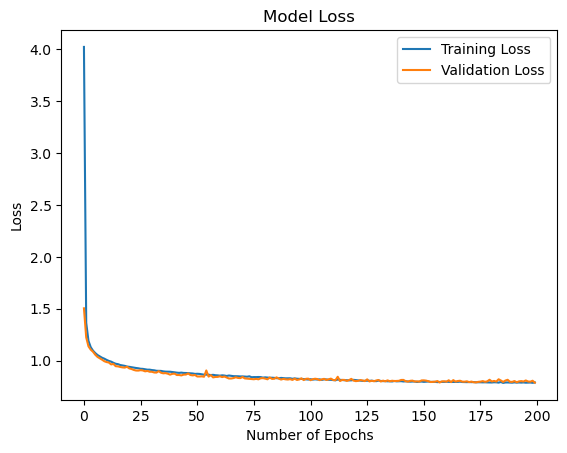

In [190]:
%matplotlib inline
# list all data in history
print(history.history.keys())

# visualize the training loss across different epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc = 'upper right')

 # 4.1. Deep Neural Networks

In [34]:
#! pip install tensorflow

In [196]:
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Dense, BatchNormalization, Dropout

# build a input layer
from keras.layers import Input

# retrieve the dimension of input features
num_features = X_train.shape[1]

# define a specific seed to control random status and enforce model reproduceability
np.random.seed(1)

# Input Layer
input_layer = Input(shape = (num_features,))

# create a hidden layer
L1 = Dense (24, activation = 'relu') (input_layer)
L2 = Dense (48, activation = 'relu') (L1)
L3 = BatchNormalization() (L2)
L4 = Dense (64, activation = 'relu') (L3)
L5 = Dense (128, activation = 'relu') (L4)
L6 = BatchNormalization() (L5)
L7 = Dense (256, activation = 'relu') (L6)
L8 = Dense (512, activation = 'relu') (L7)
L9 = BatchNormalization() (L8)
L10 = Dropout(0.1) (L9)

# output layer and model summary
output_layer = Dense (1, activation = 'linear') (L10)

# Build a model
from keras.models import Model
dnn_model = Model(input_layer, output_layer)
dnn_model.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,889 (706.60 KB)

 Trainable params: 179,513 (701.22 KB)

 Non-trainable params: 1,376 (5.38 KB)

In [197]:
from tensorflow.keras.optimizers import Adam, SGD

# Save best model using checkpoint strategy
filepath = 'Results/Best_model/dnn_model.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto') #auto: The direction is automatically inferred from the name of the monitored quantity. For metrics like val_loss, where a decrease is better, it sets the mode to min. Conversely, for metrics like accuracy, where an increase is better, it sets the mode to max.
callbacks_list = [checkpoint]

# compilation of model
dnn_model.compile(optimizer=Adam(learning_rate = 0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# modelfitting

history = dnn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/100
271/288 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9450 - mean_absolute_error: 1.8795
Epoch 1: val_loss improved from inf to 1.46271, saving model to Results/Best_model/dnn_model.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.7803 - mean_absolute_error: 1.8457 - val_loss: 1.4627 - val_mean_absolute_error: 0.8840
Epoch 2/100
282/288 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6110 - mean_absolute_error: 0.9114
Epoch 2: val_loss improved from 1.46271 to 1.07377, saving model to Results/Best_model/dnn_model.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6093 - mean_absolute_error: 0.9110 - val_loss: 1.0738 - val_mean_absolute_error: 0.7170
Epoch 3/100
285/288 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2981 - mean_absolute_error: 0.8178
Epoch 3: val_loss improved from 1.07377 to 1.02580, saving model to Results/Best_model/dnn_model.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2982 - mean_absolute_error: 0.8178 - val_loss: 1.0258 - val_mean_absolut

In [121]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved model
Saved_model_dnn = load_model('Results/Best_model/dnn_model.keras')

# Make predictions on training data
y_pred = Saved_model_dnn.predict(X_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
rrmse = rmse/np.mean(y_test)*100
print(f'R2 score is: {r2:.2f}')
print(f'RMSE is: {rmse:.2f}')
print(f'RRMSE is: {rrmse:.2f}%')

360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R2 score is: 0.93
RMSE is: 0.57
RRMSE is: 20.32%


In [122]:
# Performance metrics for testing data
y_pred = Saved_model_dnn.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rrmse = rmse/np.mean(y_test)*100
print(f'R2 score is: {r2:.2f}')
print(f'RMSE is: {rmse:.2f}')
print(f'RRMSE is: {rrmse:.2f}%')

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
R2 score is: 0.85
RMSE is: 0.80
RRMSE is: 28.59%


In [138]:
# list all data in history
print(history.history.keys())

# visualize the training loss across different epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc = 'upper right')

dict_keys(['loss', 'val_loss'])


<IPython.core.display.Javascript object>

In [137]:
# Sccaltter plot for testing data sets
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Observed ETa, mm/day')
plt.ylabel('Predicted ETa, mm/day')
plt.title('Observed vs Predicted ETa Using LR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw = 3)  # Adds a reference line

# Annotating the plot with the performance metrics
textstr = '\n'.join((
    'Testing set',
    f'R²: {r2_cnn:.2f}',
    f'MSE: {mse_cnn:.2f}',
    f'RMSE: {rmse_cnn:.2f} mm/day'
))
# These are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Place a text box in upper left in axes coords
plt.gca().text(0.04, 0.96, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.show()

<IPython.core.display.Javascript object>

# 4.2. 1D Convolutional Neural Networks

In [35]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

2024-08-08 13:18:53.457060: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-08 13:18:53.713891: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-08 13:18:53.966443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 13:18:54.164459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 13:18:54.227545: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-08 13:18:54.647277: I tensorflow/core/platform/cpu_feature_gu

In [38]:
# Reshape the data to fit the model input
X_train_scaled_reshape = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled_reshape = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [39]:
# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))

# Suppose you have a 1D input sequence: [1, 2, 3, 4, 5].
# You define a filter (or kernel) with values [0.2, 0.5].
# The convolution operation would start by placing the filter at the beginning of the sequence and computing the dot product: (1*0.2) + (2*0.5) = 0.2 + 1.0 = 1.2
# A convolutional layer typically has multiple filters. Each filter detects different features or patterns in the input data.
# filters=64: This means the convolutional layer has 64 different filters (kernels). Each of these filters will produce a separate feature map, so the output of this convolutional layer will have 64 channels.
# kernel_size=2: Each filter will cover 2 consecutive elements of the input data at a time.  

model.add(MaxPooling1D(pool_size=2))

# It reduces the dimensionality of the input, which helps to decrease the computational load and to capture dominant features more effectively.
# Input: [1, 3, 2, 5, 4, 6]
# With pool_size=2, the max pooling operation will:
# Look at the first two elements [1, 3] and take the maximum, which is 3.
# Move the window to the next two elements [2, 5] and take the maximum, which is 5.
# Move the window to the next two elements [4, 6] and take the maximum, which is 6.
# Output: [3, 5, 6]

model.add(Flatten())
model.add(Dense(128, activation='relu'))# Added more neurons for a potentially deeper representation
model.add(Dropout(0.15))  # Dropout layer to reduce overfitting
model.add(Dense(1))  # Output layer for regression

# Model summary
model.summary()

/home/jovyan/.local/geoai/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,601 (193.75 KB)

 Trainable params: 49,601 (193.75 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

checkpoint_path = 'Results/Best_model/best_model_cnn.keras'

# Set up the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Fit the model
history = model.fit(X_train_scaled_reshape, y_train, epochs=200, batch_size= 16, validation_split=0.20, callbacks=[checkpoint], verbose=1)

# After training, you can load the best model
saved_model_cnn = load_model(checkpoint_path)

Epoch 1/200
530/575 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7293
Epoch 1: val_loss improved from inf to 1.18157, saving model to Results/Best_model/best_model_cnn.keras
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6492 - val_loss: 1.1816
Epoch 2/200
533/575 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1979
Epoch 2: val_loss improved from 1.18157 to 1.06877, saving model to Results/Best_model/best_model_cnn.keras
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2005 - val_loss: 1.0688
Epoch 3/200
550/575 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1537
Epoch 3: val_loss improved from 1.06877 to 1.04976, saving model to Results/Best_model/best_model_cnn.keras
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1541 - val_loss: 1.0498
Epoch 4/200
555/575 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1177
Epoch 4: val_loss improved from 1.04976 to 0.98762, saving model to Results/Best_model/best_model_cnn.keras
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1175 - val_loss: 0.9876


In [41]:
# Evaluating the model on the test set
y_pred_cnn = saved_model_cnn.predict(X_train_scaled_reshape)
y_pred_cnn_reshape = y_pred_cnn.reshape(-1)
r2_cnn = r2_score(y_train, y_pred_cnn_reshape)
mse_cnn = mean_squared_error(y_train, y_pred_cnn_reshape)
rmse_cnn = np.sqrt(mse_cnn)
mbe_cnn = np.mean(y_train - y_pred_cnn_reshape)  # MBE

# Displaying the best parameters and test set evaluation metrics
print(f'R2 score on test set: {r2_cnn:.2f}')
print(f'RMSE on test set: {rmse_cnn:.2f}')
print(f'MBE: {mbe_cnn:.2f}')

360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
R2 score on test set: 0.91
RMSE on test set: 0.63
MBE: -0.01


In [42]:
# Evaluating the model on the test set
y_pred_cnn = saved_model_cnn.predict(X_test_scaled_reshape)
y_pred_cnn_reshape = y_pred_cnn.reshape(-1)
r2_cnn = r2_score(y_test, y_pred_cnn_reshape)
mse_cnn = mean_squared_error(y_test, y_pred_cnn_reshape)
rmse_cnn = np.sqrt(mse_cnn)
mbe_cnn = np.mean(y_test - y_pred_cnn_reshape)  # MBE

# Displaying the best parameters and test set evaluation metrics
print(f'R2 score on test set: {r2_cnn:.2f}')
print(f'RMSE on test set: {rmse_cnn:.2f}')
print(f'MBE: {mbe_cnn:.2f}')

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
R2 score on test set: 0.86
RMSE on test set: 0.79
MBE: -0.02


dict_keys(['loss', 'val_loss'])


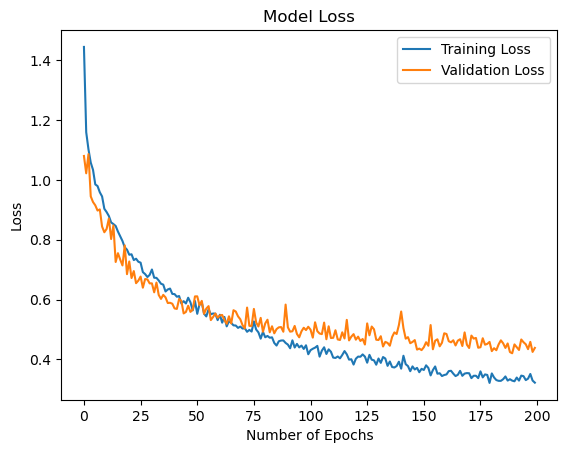

In [65]:
# list all data in history
print(history.history.keys())

# visualize the training loss across different epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc = 'upper right')

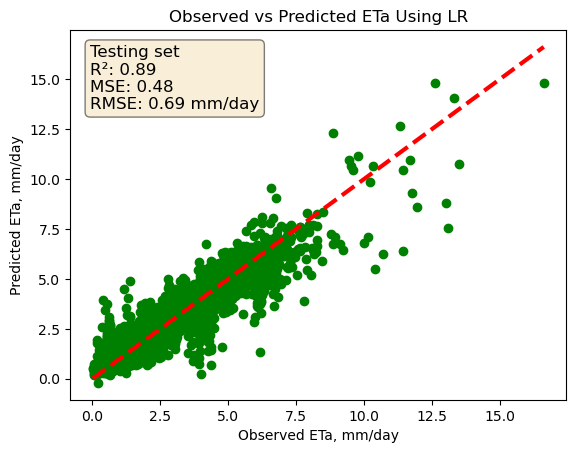

In [46]:
# Sccaltter plot for testing data sets
plt.scatter(y_test, y_pred_cnn, color='green')
plt.xlabel('Observed ETa, mm/day')
plt.ylabel('Predicted ETa, mm/day')
plt.title('Observed vs Predicted ETa Using LR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw = 3)  # Adds a reference line

# Annotating the plot with the performance metrics
textstr = '\n'.join((
    'Testing set',
    f'R²: {r2_cnn:.2f}',
    f'MSE: {mse_cnn:.2f}',
    f'RMSE: {rmse_cnn:.2f} mm/day'
))
# These are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Place a text box in upper left in axes coords
plt.gca().text(0.04, 0.96, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.show()

In [62]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

epochs = len(history.history['loss'])
x_data = np.arange(1, epochs + 1)

# Find the epoch with the minimum validation loss
min_val_loss_epoch = np.argmin(history.history['val_loss']) + 1  # +1 because epochs start at 1
min_val_loss_value = min(history.history['val_loss'])

fig, ax = plt.subplots()
ax.set_xlim(0, epochs)
ax.set_ylim(min(min(history.history['loss']), min_val_loss_value),
            max(max(history.history['loss']), max(history.history['val_loss'])))

line1, = ax.plot([], [], label='Training Loss')
line2, = ax.plot([], [], label='Validation Loss')
# Plot the vertical line for the best model
best_model_line = ax.axvline(x=min_val_loss_epoch, color='green', linestyle='--', alpha=0.7, label='Best Model')
ax.annotate(f'Best Model at Epoch {min_val_loss_epoch}', xy=(min_val_loss_epoch, min_val_loss_value), xytext=(min_val_loss_epoch+12, min_val_loss_value+0.12),
            arrowprops=dict(facecolor='green', shrink=0.05),)

ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss Over 200 Epochs')

def animation_frame(i):
    line1.set_data(x_data[:i+1], history.history['loss'][:i+1])
    line2.set_data(x_data[:i+1], history.history['val_loss'][:i+1])
    # Update the vertical line and annotation to only show when the animation reaches the best model epoch
    best_model_line.set_visible(i+1 >= min_val_loss_epoch)
    return line1, line2, best_model_line

animation = FuncAnimation(fig, animation_frame, frames=np.arange(0, epochs), interval=50, blit=False)

plt.show()
# Save the animation to your directory
#animation.save(r'D:\My PhD\ETa Paper\Animation\animation.gif', writer='pillow', fps=30)

<IPython.core.display.Javascript object>